In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import tqdm


In [2]:
data_path = "/mnt/nas2/JB/_data_summary/Supporting_Information_file_2.xlsx"
# "/mnt/nas2/FH/_connectomics/230816_louvain/clustering_list_JB.xlsx"

In [3]:
!pip install openpyxl

In [4]:
df = pd.read_excel(data_path,skiprows=12)
df[:20]

,cluster nb in figure,cluster,name,count,count comment,phenotype class,phenotype,reference,Others,Reference,Unnamed: 10
0,0.0,0,DNde006,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,DNde007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,DNg10,1,NaN,anterior,anterior reaching movements,Optogenetic dissection of descending behaviora...,"""We did not observe fluorescence responses dur...",Imaging neural activity in the ventral nerve ...,NaN
3,0.0,0,DNg12,40,NaN,anterior,ventral head sweeps and leg rubbing,Descending neurons coordinate anterior groomin...,NaN,NaN,NaN
4,0.0,0,DNg17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0,DNg21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0,DNg22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0,DNge001,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0,DNge009,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0,DNge011,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
np.unique(df["cluster nb in figure"])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan])

In [6]:
behaviours = ["anterior", "takeoff", "landing", "walking", "flight"]  # , "turning"]
n_beh = len(behaviours)

In [7]:
df["count"].values.dtype

dtype('int64')

In [85]:
def get_beh_for_cluster(df, i_cluster):
    cluster_df = df[df["cluster nb in figure"] == i_cluster]
    n_neurons = np.sum(cluster_df["count"].values)
    
    n_neurons_per_beh = np.zeros_like(behaviours, dtype=int)
    
    for i_beh, behaviour in enumerate(behaviours):
        beh_df = cluster_df[cluster_df["phenotype class"] == behaviour]
        n_neurons_per_beh[i_beh] = np.sum(beh_df["count"].values)
    return n_neurons_per_beh, np.sum(n_neurons_per_beh), n_neurons - np.sum(n_neurons_per_beh)


In [9]:
n_cluster = 12
cluster_behaviour = np.zeros((n_cluster, n_beh))
cluster_behaviour_known = np.zeros((n_cluster))
cluster_behaviour_unknown = np.zeros((n_cluster))
for i_cluster in range(n_cluster):
    cluster_behaviour[i_cluster], cluster_behaviour_known[i_cluster], cluster_behaviour_unknown[i_cluster] = get_beh_for_cluster(i_cluster)

In [10]:
print(cluster_behaviour_known)
print(cluster_behaviour_unknown)

[45. 15. 12. 17.  1.  0.  2.  0.  0. 16. 13. 11.]
[ 76. 110. 168. 109. 119.  40.  28.  22.  12. 100.  26.  33.]


In [11]:
cluster_behaviour_norm = cluster_behaviour / np.repeat(cluster_behaviour_known[:,np.newaxis], repeats=n_beh, axis=-1)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [12]:
linewidth = 2
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelpad'] = 5

def make_nice_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 2*linewidth))
    ax.spines['bottom'].set_position(('outward',2*linewidth))
    ax.tick_params(width=linewidth)
    ax.tick_params(length=2.5*linewidth)
    ax.tick_params(labelsize=16)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(0)
    ax.spines["right"].set_linewidth(0)

<IPython.core.display.Javascript object>


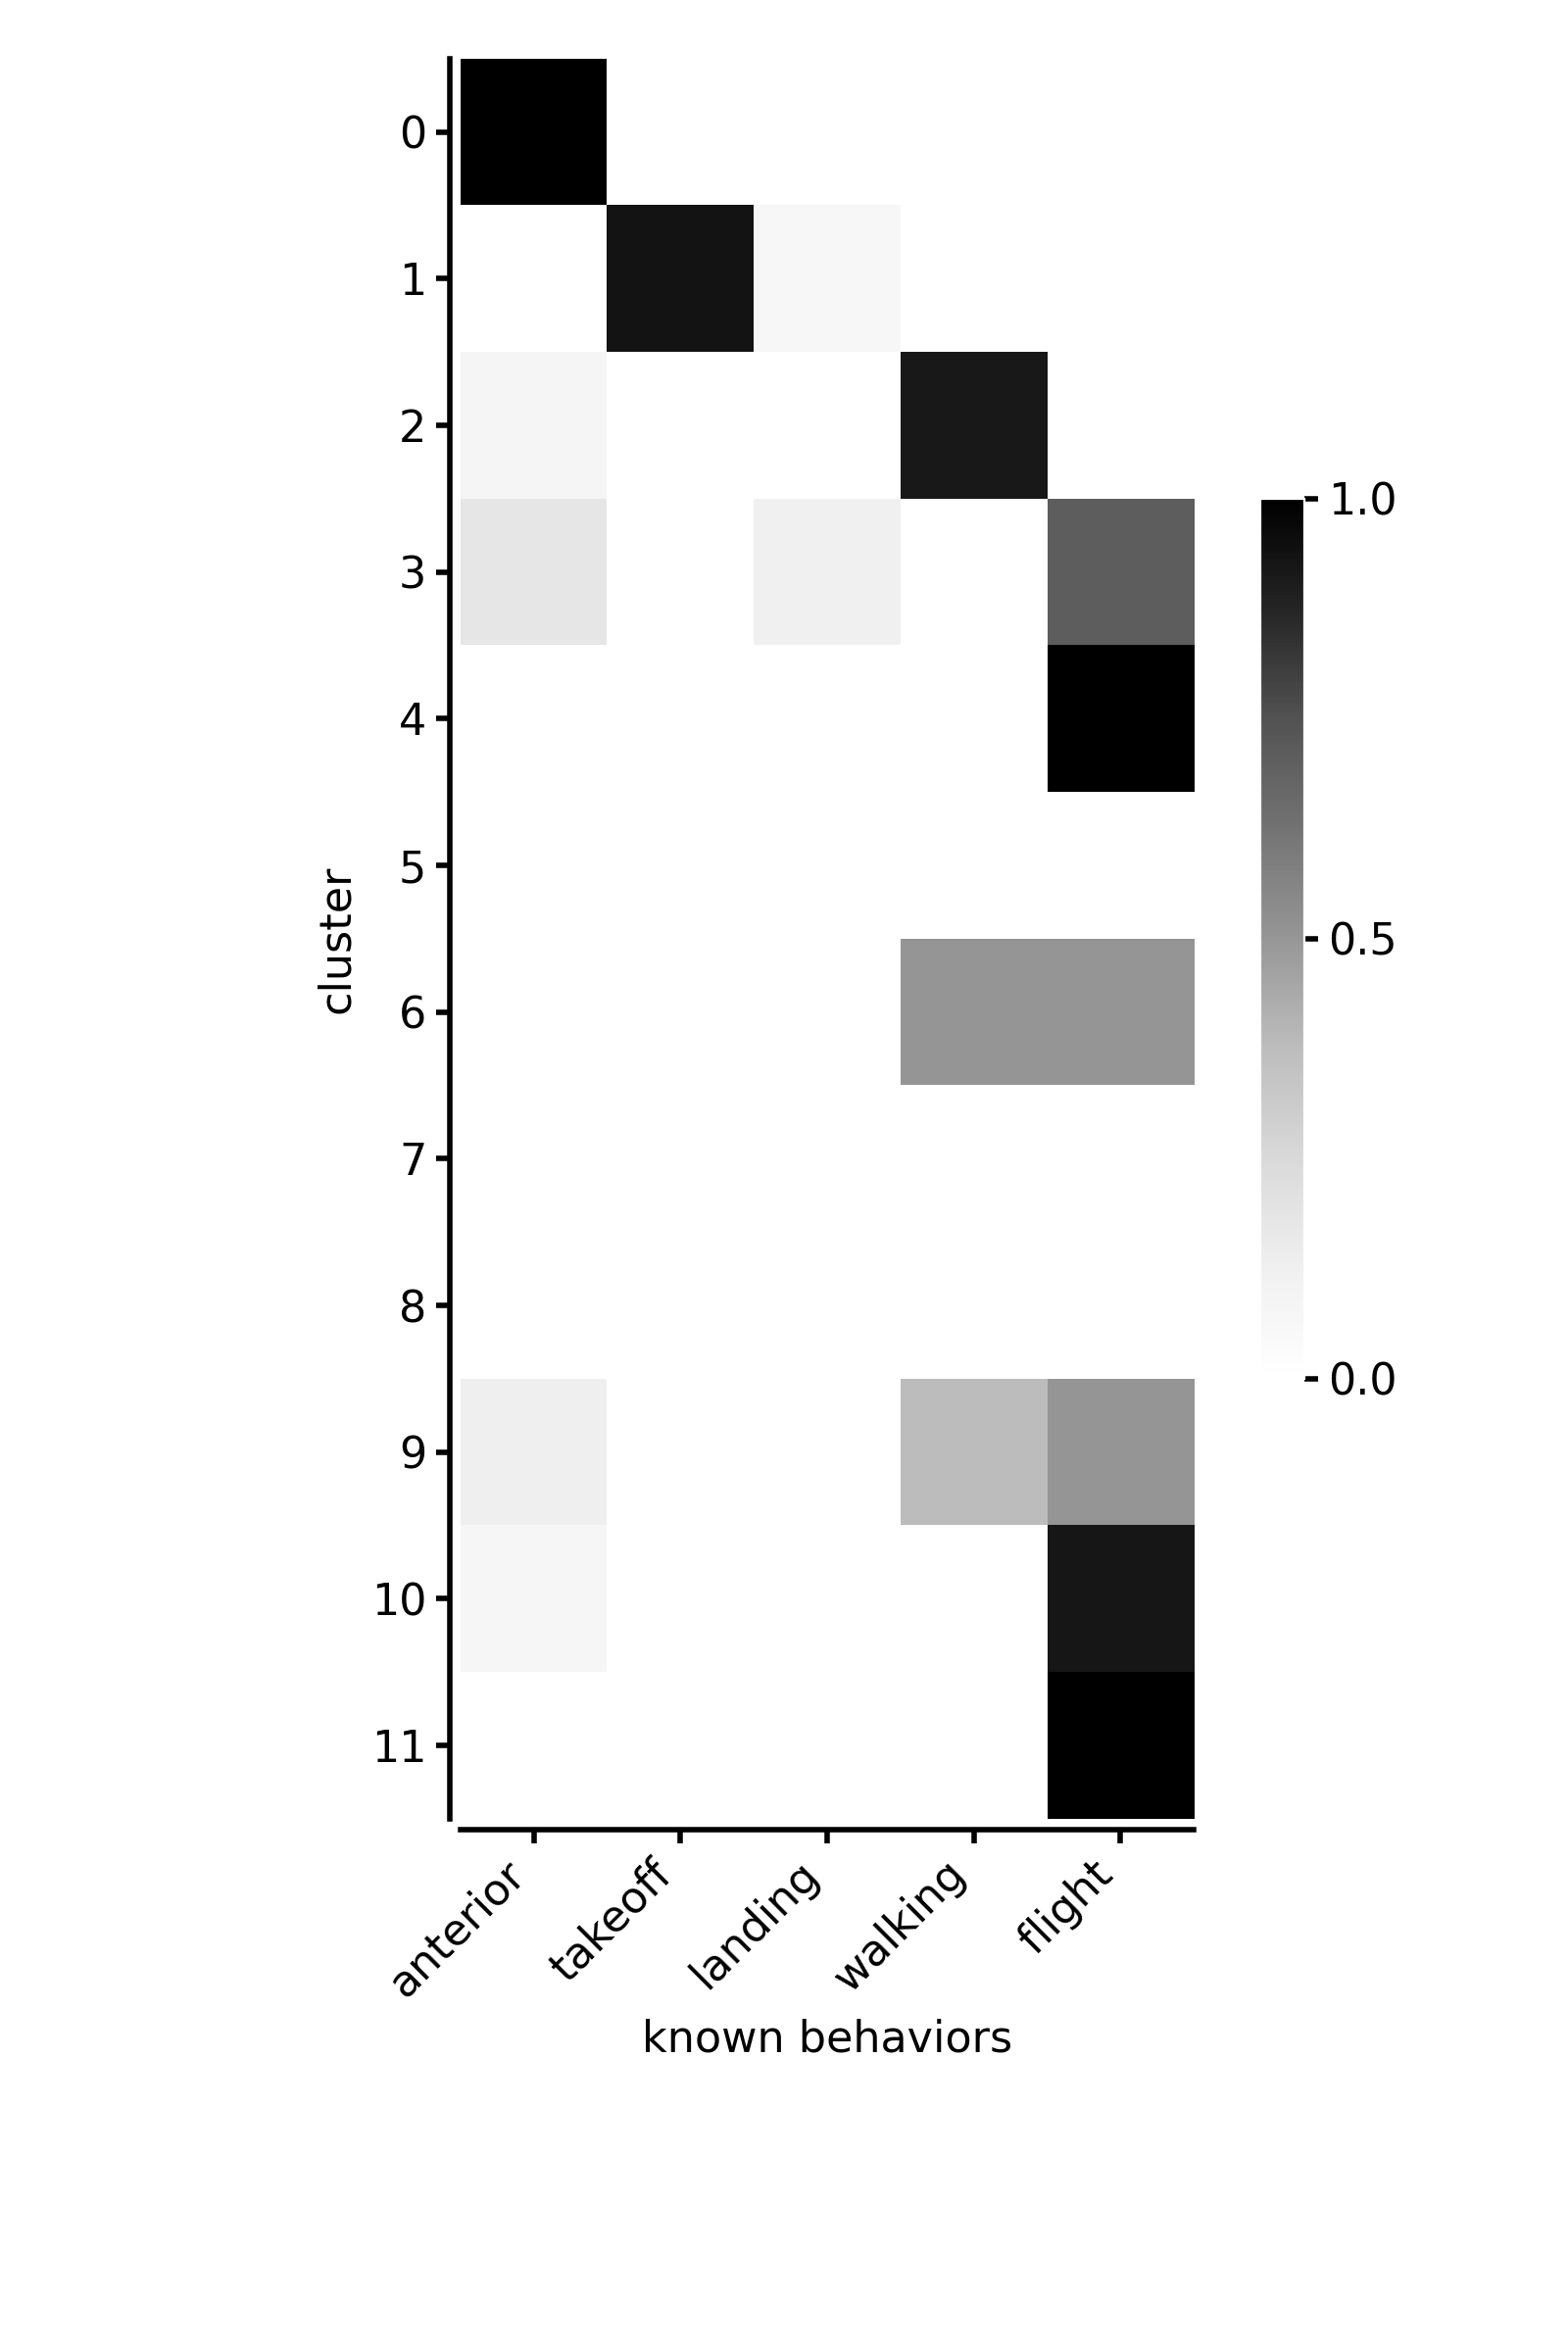

In [13]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(4,6))
im = ax.imshow(cluster_behaviour_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_beh))
ax.set_yticks(np.arange(n_cluster))
ax.set_xlabel("known behaviors")
ax.set_ylabel("cluster")
make_nice_spines(ax)
ax.set_xticklabels(behaviours, rotation=45, ha="right")

cbar = plt.colorbar(im, ax=ax, shrink=0.5, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

In [14]:
df_vnc = pd.read_excel(data_path,sheet_name="VNC_innervation", )
df_vnc = df_vnc.fillna(0)
df_vnc

,name,NTct,WTct,HTct,IntTct,LTct,T1,T2,T3,Ov,ANm,mVAC
0,DNc01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,DNc02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,DNd03,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,DNx01,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DNp11,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,DNp23,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
95,DNg29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
96,DNp01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,DNp04,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
vnc_names = ['T1', 'T2', 'T3', 'LTct', 'IntTct', 'NTct', 'WTct', 'HTct', 'Ov', 'ANm', 'mVAC']  # df_vnc.columns.values[1:]
print(vnc_names)
n_vnc = len(vnc_names)

['T1', 'T2', 'T3', 'LTct', 'IntTct', 'NTct', 'WTct', 'HTct', 'Ov', 'ANm', 'mVAC']


In [106]:
def get_vnc_for_cluster(df, i_cluster):
    cluster_df = df[df["cluster nb in figure"] == i_cluster]
    n_neurons = np.sum(cluster_df["count"].values)
    
    n_neurons_per_vnc = np.zeros_like(vnc_names, dtype=int)
    n_neurons_unknown = 0
    
    for index, row in cluster_df.iterrows():
        n = row["count"]
        name = row["name"]
        if not np.sum(df_vnc["name"]==name):
            n_neurons_unknown += n
            continue
        # print("found", name)
        neuron_df = df_vnc[df_vnc["name"] == name]
        for i_vnc, vnc_name in enumerate(vnc_names):
            if neuron_df[vnc_name].values[0]:
                n_neurons_per_vnc[i_vnc] += n
        
            
    n_neurons_known = n_neurons - n_neurons_unknown
    
    return n_neurons_per_vnc, n_neurons_known, n_neurons_unknown

In [17]:
cluster_vnc = np.zeros((n_cluster, n_vnc))
cluster_vnc_known = np.zeros((n_cluster))
cluster_vnc_unknown = np.zeros((n_cluster))

for i_cluster in range(n_cluster):
    cluster_vnc[i_cluster,:], cluster_vnc_known[i_cluster], cluster_vnc_unknown[i_cluster] = get_vnc_for_cluster(i_cluster)

In [18]:
cluster_vnc_norm = cluster_vnc / np.repeat(cluster_vnc_known[:,np.newaxis], repeats=n_vnc, axis=-1)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [19]:
print(cluster_vnc_known)
print(cluster_vnc_unknown)

[50. 26. 45. 39. 18. 13.  6.  0.  7. 36. 23. 20.]
[ 71.  99. 135.  87. 102.  27.  24.  22.   5.  80.  16.  24.]


<IPython.core.display.Javascript object>


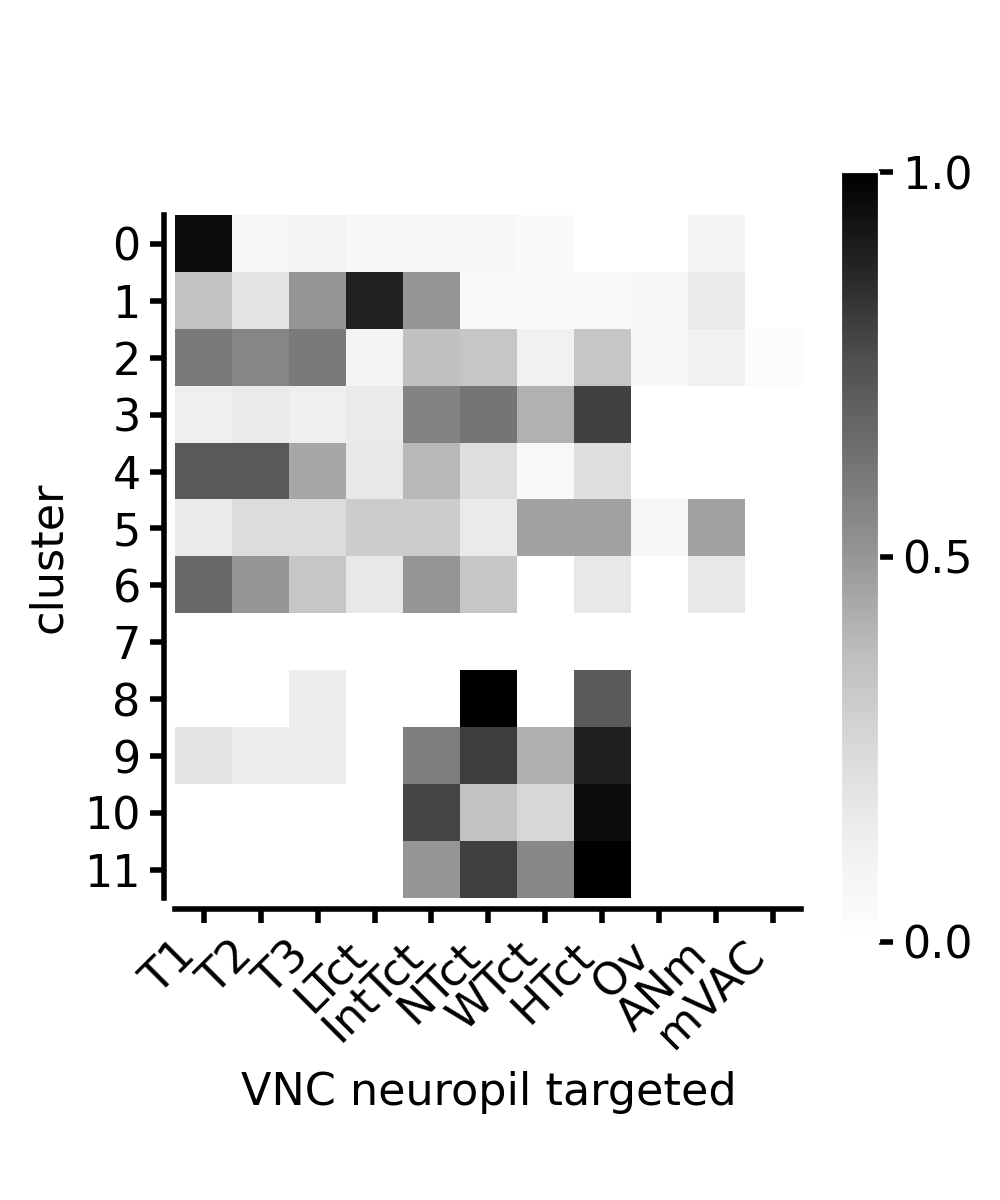

In [20]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(5,6))
im = ax.imshow(cluster_vnc_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_vnc))
ax.set_yticks(np.arange(n_cluster))
make_nice_spines(ax)
ax.set_xticklabels(vnc_names, rotation=45, ha="right")
ax.set_xlabel("VNC neuropil targeted")
ax.set_ylabel("cluster")
cbar = plt.colorbar(im, ax=ax, shrink=0.73, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

<IPython.core.display.Javascript object>


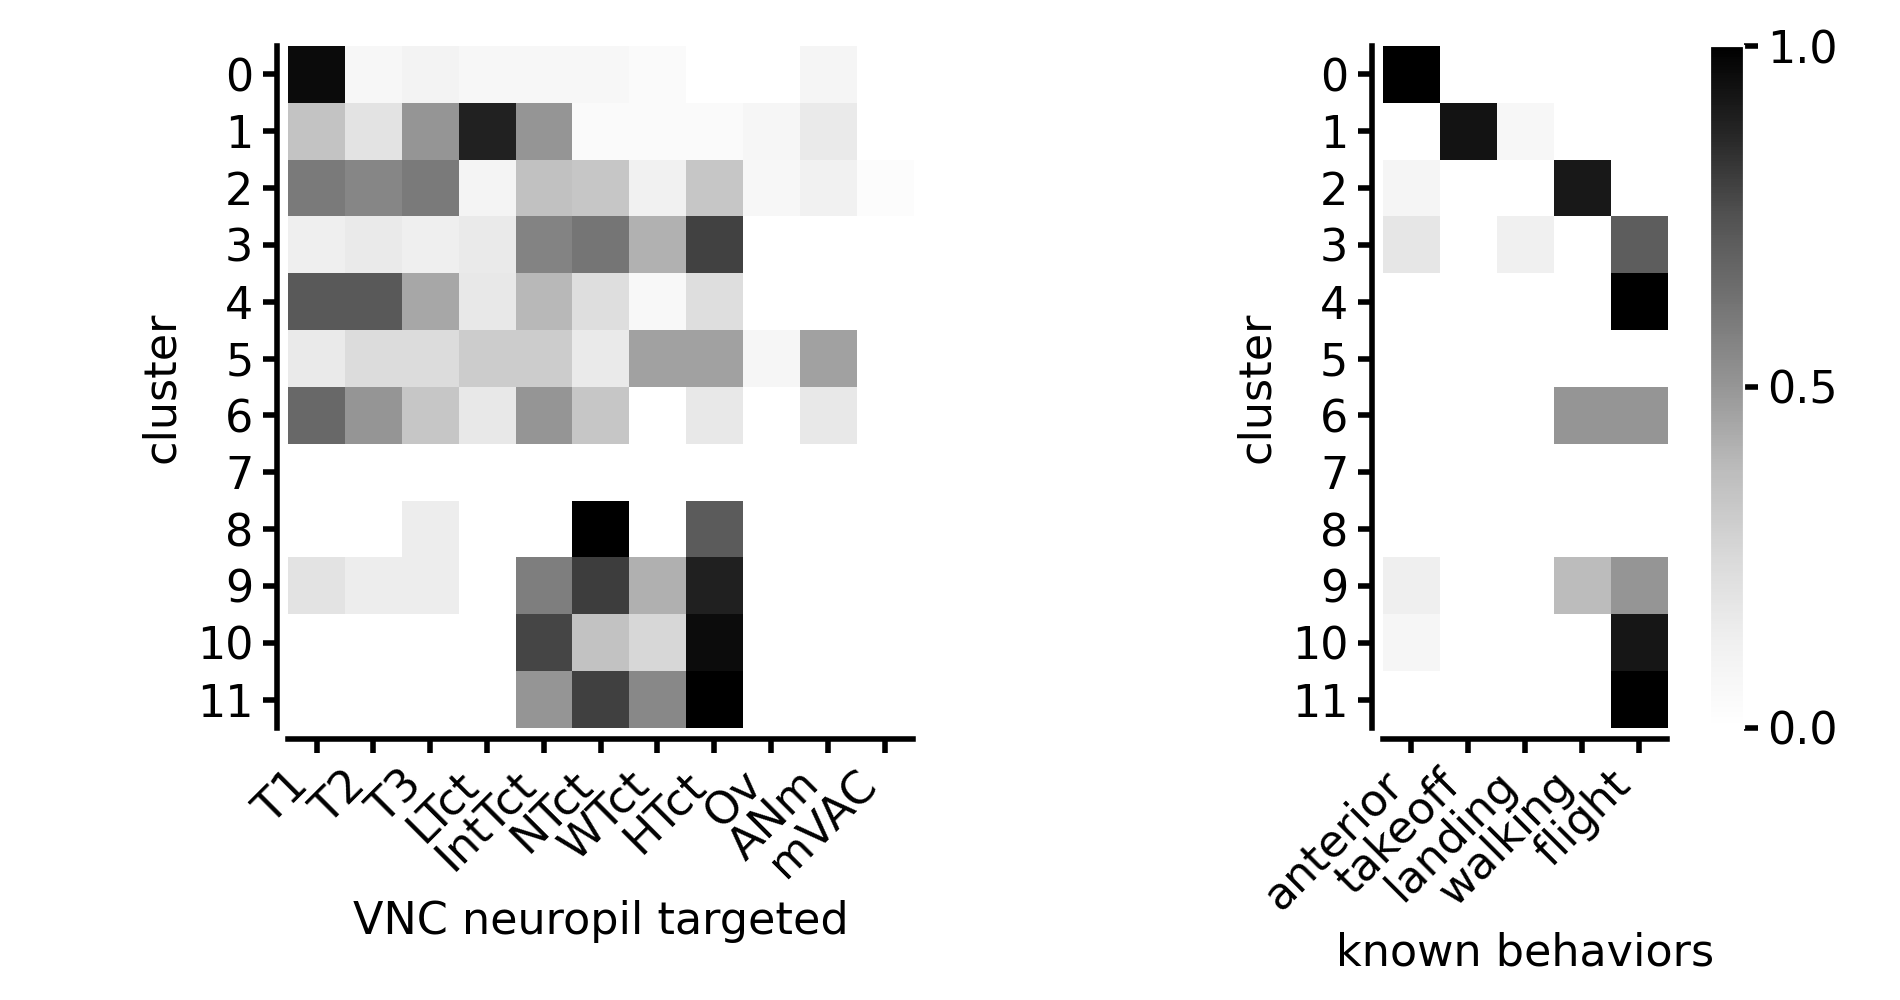

In [21]:
fig, axs = plt.subplots(1,2, figsize=(9.5,5))  # , sharey=True)
ax = axs[0]
im = ax.imshow(cluster_vnc_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_vnc))
ax.set_yticks(np.arange(n_cluster))
make_nice_spines(ax)
ax.set_xticklabels(vnc_names, rotation=45, ha="right")
ax.set_xlabel("VNC neuropil targeted")
ax.set_ylabel("cluster")

ax = axs[1]
im = ax.imshow(cluster_behaviour_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_beh))
ax.set_yticks(np.arange(n_cluster))
ax.set_xlabel("known behaviors")
ax.set_ylabel("cluster")
make_nice_spines(ax)
ax.set_xticklabels(behaviours, rotation=45, ha="right")

cbar = plt.colorbar(im, ax=ax, shrink=1, ticks=[0,0.5,1])
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

# out_dir = "/mnt/nas2/FH/_connectomics/230816_louvain"
# fig.savefig(os.path.join(out_dir, "230817_clusters_vnc_behaviour.pdf"), dpi=300)

In [22]:
df_studied = pd.read_excel(data_path,sheet_name="Studied_DNs", )
df_studied = df_studied.fillna(0)
df_studied

,name,0,1,2,3,4,5,6,7,8,9,10,11,n.c.
0,DNp09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,aDN2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MDN,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,aDN1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DNa01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,DNa02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,DNb02,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
7,DNg14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,mute,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
names = df_studied.name.values
names

array(['DNp09', 'aDN2', 'MDN', 'aDN1', 'DNa01', 'DNa02', 'DNb02', 'DNg14',
       'mute'], dtype=object)

In [24]:
values = (df_studied.values[:,1:]).astype(float)  # [:,-1:0:-1]
values

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
values_norm = values / np.repeat(np.sum(values, axis=1, keepdims=True), 13, axis=1)
values_norm

array([[0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  ,
        0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.  ,
        0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.5 ],
       [0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]])

<IPython.core.display.Javascript object>


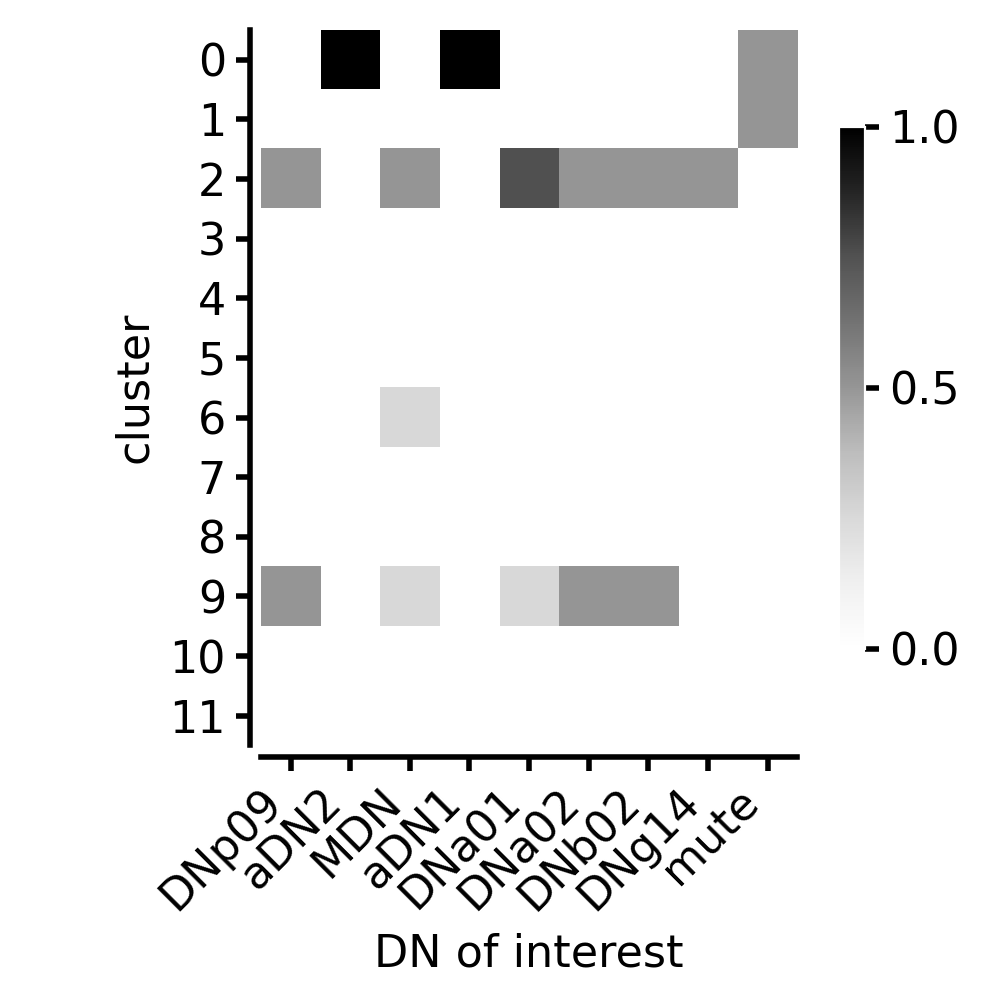

In [26]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(5,5))
im = ax.imshow(values_norm[:,:-1].T, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(n_cluster))
make_nice_spines(ax)
ax.set_xticklabels(names, rotation=45, ha="right")
ax.set_xlabel("DN of interest")
ax.set_ylabel("cluster")
cbar = plt.colorbar(im, ax=ax, shrink=0.73, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

# out_dir = "/mnt/nas2/FH/_connectomics/230816_louvain"
# fig.savefig(os.path.join(out_dir, "230829_clusters_known_DNs.pdf"), dpi=300)

# verifying 2nd type of clustering

In [29]:
data_path = "/mnt/nas2/FH/_connectomics/230830_louvain_glut_positive/clustering_list_JB.xlsx"

In [47]:
df_glut = pd.read_excel(data_path,skiprows=6)
df_glut[:20]

,cluster nb in figure,cluster,name,count,phenotype class,phenotype,Unnamed: 6,Unnamed: 7
0,1.0,0,DNa05,2,NaN,NaN,NaN,NaN
1,1.0,0,DNa07,1,NaN,NaN,NaN,NaN
2,1.0,0,DNa08,1,NaN,NaN,NaN,NaN
3,1.0,0,DNa09,2,NaN,NaN,NaN,NaN
4,1.0,0,DNa10,2,NaN,NaN,NaN,NaN
5,1.0,0,DNae004,2,NaN,NaN,NaN,NaN
6,1.0,0,DNae005,2,NaN,NaN,NaN,NaN
7,1.0,0,DNae008,1,NaN,NaN,NaN,NaN
8,1.0,0,DNae011,2,NaN,NaN,NaN,NaN
9,1.0,0,DNae012,2,NaN,NaN,NaN,NaN


In [33]:
np.unique(df_glut["cluster nb in figure"])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan])

In [34]:
df

,cluster nb in figure,cluster,name,count,count comment,phenotype class,phenotype,reference,Others,Reference,Unnamed: 10
0,0.0,0,DNde006,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,DNde007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,DNg10,1,NaN,anterior,anterior reaching movements,Optogenetic dissection of descending behaviora...,"""We did not observe fluorescence responses dur...",Imaging neural activity in the ventral nerve ...,NaN
3,0.0,0,DNg12,40,NaN,anterior,ventral head sweeps and leg rubbing,Descending neurons coordinate anterior groomin...,NaN,NaN,NaN
4,0.0,0,DNg17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902,11.0,245,DNpe055,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,11.0,245,DNpe062,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,11.0,245,DNpe068,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,11.0,245,DNpe075,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
def get_dn_beh_match(df):
    known_dns = []
    unique_names = list(set(df.name))
    for unique_name in unique_names:
        df_unique = df[df.name == unique_name]
        if not len(list(set(df_unique["phenotype class"]))):
            print(df_unique)
        else:
            known_dns.append({unique_name: df_unique["phenotype class"].values[0]})
    return known_dns

In [43]:
list(set(["a", "b", "a"]))

['b', 'a']

In [46]:
dn_beh_match = get_dn_beh_match(df)

In [61]:
dn_match = dn_beh_match[17]
dn_match

{'aDN1': 'anterior'}

In [62]:
dn_name = list(dn_match.keys())[0]
dn_name

'aDN1'

In [66]:
dn_match[dn_name]

'anterior'

In [80]:
df_glut.loc[df_glut.name == dn_name, ("phenotype class")] = dn_match[dn_name]

In [81]:
df_glut[df_glut.name == dn_name]["phenotype class"] 

252    anterior
Name: phenotype class, dtype: object

In [82]:
def add_matched_dns_to_df(df, dn_beh_match):
    for dn_match in dn_beh_match:
        dn_name = list(dn_match.keys())[0]
        df.loc[df.name == dn_name, ("phenotype class")] = dn_match[dn_name]
    return df

In [83]:
df_glut = add_matched_dns_to_df(df_glut, dn_beh_match)

In [84]:
set(df_glut["phenotype class"].values)

{'abdomen', 'anterior', 'flight', 'landing', nan, 'takeoff', 'walking'}

In [96]:
n_cluster_glut = 11
cluster_glut_behaviour = np.zeros((n_cluster_glut, n_beh))
cluster_glut_behaviour_known = np.zeros((n_cluster_glut))
cluster_glut_behaviour_unknown = np.zeros((n_cluster_glut))
for i_cluster in range(n_cluster_glut):
    cluster_glut_behaviour[i_cluster], cluster_glut_behaviour_known[i_cluster], cluster_glut_behaviour_unknown[i_cluster] = get_beh_for_cluster(df_glut, i_cluster+1)

In [97]:
print(cluster_behaviour_known)
print(cluster_behaviour_unknown)

[45. 15. 12. 17.  1.  0.  2.  0.  0. 16. 13. 11.]
[ 76. 110. 168. 109. 119.  40.  28.  22.  12. 100.  26.  33.]


In [98]:
print(cluster_glut_behaviour_known)
print(cluster_glut_behaviour_unknown)

[46. 11. 45. 14.  1.  9.  3.  3.  6.  0.  0.]
[169. 155.  77. 106. 141.  71.  75.  68.  31.  12.  38.]


In [99]:
cluster_glut_behaviour_norm = cluster_glut_behaviour / np.repeat(cluster_glut_behaviour_known[:,np.newaxis], repeats=n_beh, axis=-1)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


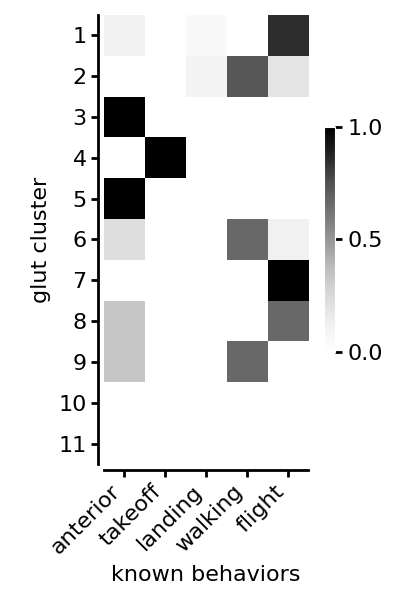

In [100]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(4,6))
im = ax.imshow(cluster_glut_behaviour_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_beh))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)

ax.set_xlabel("known behaviors")
ax.set_ylabel("glut cluster")
make_nice_spines(ax)
ax.set_xticklabels(behaviours, rotation=45, ha="right")

cbar = plt.colorbar(im, ax=ax, shrink=0.5, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

In [107]:
cluster_glut_vnc = np.zeros((n_cluster_glut, n_vnc))
cluster_glut_vnc_known = np.zeros((n_cluster_glut))
cluster_glut_vnc_unknown = np.zeros((n_cluster_glut))

for i_cluster in range(n_cluster_glut):
    cluster_glut_vnc[i_cluster,:], cluster_glut_vnc_known[i_cluster], cluster_glut_vnc_unknown[i_cluster] = get_vnc_for_cluster(df_glut, i_cluster+1)

In [108]:
cluster_glut_vnc_norm = cluster_glut_vnc / np.repeat(cluster_glut_vnc_known[:,np.newaxis], repeats=n_vnc, axis=-1)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [109]:
print(cluster_vnc_known)
print(cluster_vnc_unknown)

[50. 26. 45. 39. 18. 13.  6.  0.  7. 36. 23. 20.]
[ 71.  99. 135.  87. 102.  27.  24.  22.   5.  80.  16.  24.]


In [110]:
print(cluster_glut_vnc_known)
print(cluster_glut_vnc_unknown)

[93. 41. 52. 26. 25. 21. 10. 17. 20.  0.  3.]
[122. 125.  70.  94. 117.  59.  68.  54.  17.  12.  35.]


<IPython.core.display.Javascript object>


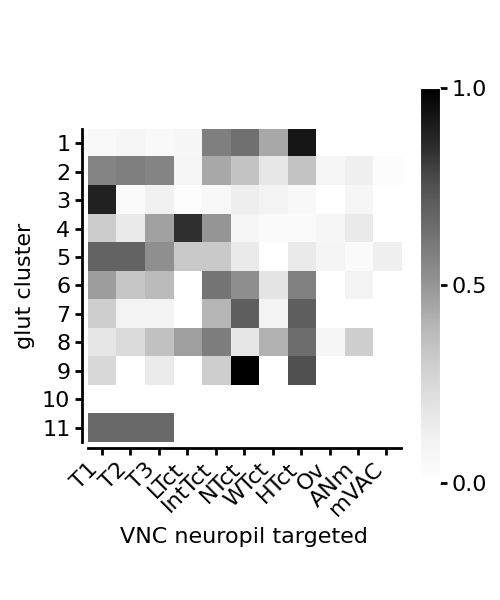

In [112]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(5,6))
im = ax.imshow(cluster_glut_vnc_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_vnc))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)

make_nice_spines(ax)
ax.set_xticklabels(vnc_names, rotation=45, ha="right")
ax.set_xlabel("VNC neuropil targeted")
ax.set_ylabel("glut cluster")
cbar = plt.colorbar(im, ax=ax, shrink=0.73, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

<IPython.core.display.Javascript object>


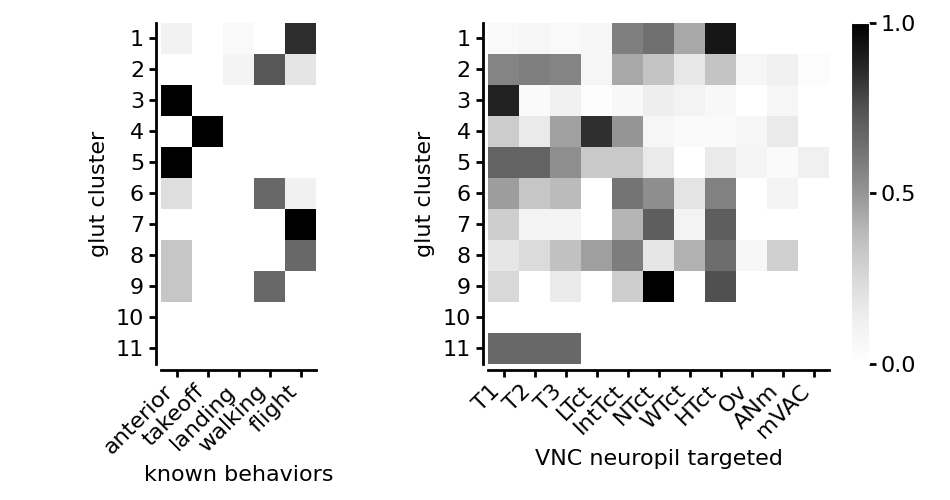

In [122]:
fig, axs = plt.subplots(1,2, figsize=(9.5,5))  # , sharey=True)
ax = axs[0]
im = ax.imshow(cluster_glut_behaviour_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_beh))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)
make_nice_spines(ax)
ax.set_xlabel("known behaviors")
ax.set_xticklabels(behaviours, rotation=45, ha="right")
ax.set_ylabel("glut cluster")

ax = axs[1]
im = ax.imshow(cluster_glut_vnc_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_vnc))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)
make_nice_spines(ax)
ax.set_xticklabels(vnc_names, rotation=45, ha="right")
ax.set_xlabel("VNC neuropil targeted")
ax.set_ylabel("glut cluster")

cbar = plt.colorbar(im, ax=ax, shrink=1, ticks=[0,0.5,1])
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

out_dir = "/mnt/nas2/FH/_connectomics/230830_louvain_glut_positive"
fig.savefig(os.path.join(out_dir, "230905_clusters_vnc_behaviour.pdf"), dpi=300)

In [116]:
df_studied_glut = pd.read_excel(data_path,sheet_name="Studied_DNs", )
df_studied_glut = df_studied_glut.fillna(0)
df_studied_glut

,name,1,2,3,4,5,6,7,8,9,10,11,n.c.
0,DNp09,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aDN2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MDN,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aDN1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DNa01,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,DNa02,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DNb02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
7,DNg14,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,mute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [117]:
values_glut = (df_studied_glut.values[:,1:]).astype(float)  # [:,-1:0:-1]
values_glut

array([[0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [119]:
values_glut_norm = values_glut / np.repeat(np.sum(values_glut, axis=1, keepdims=True), 12, axis=1)
values_glut_norm

array([[0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5]])

<IPython.core.display.Javascript object>


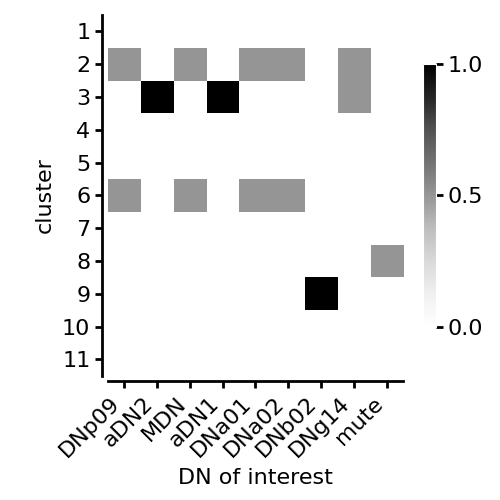

In [123]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(5,5))
im = ax.imshow(values_glut_norm[:,:-1].T, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)
make_nice_spines(ax)
ax.set_xticklabels(names, rotation=45, ha="right")
ax.set_xlabel("DN of interest")
ax.set_ylabel("cluster")
cbar = plt.colorbar(im, ax=ax, shrink=0.73, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

out_dir = "/mnt/nas2/FH/_connectomics/230830_louvain_glut_positive"
fig.savefig(os.path.join(out_dir, "230905_clusters_known_DNs.pdf"), dpi=300)